# Data Mining and Visualization Final Project

## Table of Contents

1. [Background](#background)
2. [Data Preprocessing](#preprocessing)
    1. [Importing the Libraries](#import)
    2. [Ingest the Dataset](#ingest)
    3. [Exploring the Dataset](#explore)
    4. [Feature Scaling](#feature-scale)
    5. [Splitting the Data](#split-data)

3. [Multiple Linear Regression](#linear-regression)
    1. [Building the Model](#build-linreg)
    2. [Visualize the Results](#visualize-linreg)
    3. [Performing Backwards Elimination](#back-elim)
    4. [Visualizing the Optimized Results](#vis-opt-linreg)

4. [SVR](#svr)
    1. [Feature Scaling](#feature-scale-svr)

## Background <a name="background"></a>

The premise of this project is to compare various regression models and their accuracy when applied to a dataset.

Our dataset is used to predict Graduate Admissions (from an Indian Perspective) and can be found [here](https://www.kaggle.com/mohansacharya/graduate-admissions/data#Admission_Predict_Ver1.1.csv).

Before preprocessing the dataset, here is a list of columns found in the CSV:
- Serial Number: An arbitrary id assigned to each row.
- GRE Score: Standardized graduate school test score (out of 340).
- TOEFL Score: Test of English as a Foreign Language score (out of 120).
- University Rating: Tier level of Undergraduate University (out of 5).
- SOP: Statement of Purpose strength (out of 5).
- LOR: Letter of Recommendation strength (out of 5).
- CGPA: Undergraduate GPA (out of 10).
- Research: Previous research experience (0 or 1).
- Chance of Admit: Admission probability (between 0 and 1).

## Data Preprocessing <a name="preprocessing"></a>

### Importing the Libraries <a name="import"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Ingest the Dataset <a name="ingest"></a>

In [2]:
dataset = pd.read_csv('data/Admission.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

### Exploring the Dataset <a name="explore"></a>

In [12]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Feature Scaling <a name="feature-scale"></a>

In [10]:
# from sklearn.preprocessing import StandardScaler
# standard_scaler_X = StandardScaler()
# X = standard_scaler_X.fit_transform(X)

### Splitting the Dataset <a name="split-data"></a>

We will split the dataset into a training set (75%) and a test set (25%).

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

## Multiple Linear Regression <a name="linear-regression"></a>

### Building the Model <a name="build-linreg"></a>

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualizing the Results <a name="visualize-linreg"></a>

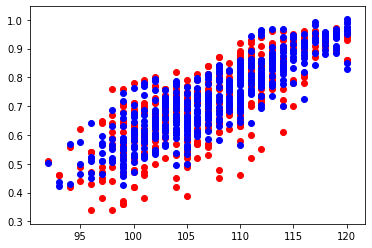

In [18]:
plt.scatter(X[:, 1], y, color='red')
plt.scatter(X[:, 1], regressor.predict(X), color='blue')
plt.show() 

### Performing Backwards Elimination <a name="back-elim"></a>
We want to find the optimal Multiple Linear Regression Model, so we'll find the "significant" parameters.

In [19]:
import statsmodels.api as sm

# Add b0
X = np.append(arr=np.ones((500,1)), values=X , axis=1)

X_opt = X[:, [0, 1, 2, 5, 6, 7]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          9.97e-182
Time:                        16:43:26   Log-Likelihood:                 699.65
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     494   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3357      0.099    -13.482      0.000      -1.530      -1.141
x1             0.0019      0.001      3.760      0.000       0.001       0.003
x2             0.0030      0.001      3.501      0.001       0.001       0.005
x3             0.0193      0.004      5.092      0.000       0.012       0.027
x4             0.1230      0.009     13.221      0.000       0.105       0.141
x5             0.0252      0.007      3.814      0.000       0.012       0.038
==============================================================================
Omnibus:                      109.027   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.874
Skew:                          -1.130   Prob(JB):                     9.07e-55
Kurtosis:                       5.615   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizing the Optimized Results <a name="vis-opt-linreg"></a>

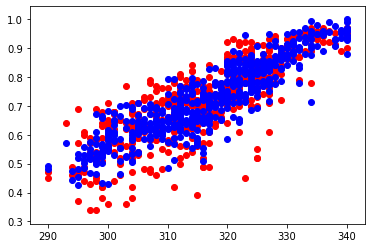

In [20]:
plt.scatter(X[:, 1], y, color='red')
plt.scatter(X[:, 1], regressor_OLS.predict(X_opt), color='blue')
plt.show() 

## SVR <a name="svr"></a>

### Feature Scaling <a name="feature-scale-svr"></a>
We need to perform feature scaling for SVR.